# Looking at More Adjacent Time Slices

In previous notebooks, I found some potential features of time-dependency in frequency-specific noise. So, I will analyze adjacent time slices to see if that's consistent.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from gwpy.timeseries import TimeSeries

# A function for making a frequency-specific strain time series
# When chosing a frequency, keep in mind the trade-off between frequency resolution and time resolution
# The available frequencies will be multiples of the 1/fftlength; however, they may not be proper
# integer multiples; chose an even power of two in order to get integer frequencies.
def freq_specific_time_series(data, start_time, analysis_length, dt, max_time, freq, fftlength=1/16.):
    lower = start_time
    upper = lower + analysis_length
    values = []
    while (upper <= max_time):
        slice = data.crop(lower, upper)
        psd = slice.psd(fftlength=fftlength)
        values += [psd.value_at(freq).value]
        lower += dt
        upper += dt
    return TimeSeries(values, None, start_time + analysis_length / 2, dt)

## 304 Hz

In [29]:
# Analyzing original data
min_time1 = 1263097420
max_time1 = 1263098020
hdata1 = TimeSeries.fetch_open_data('H1', min_time1, max_time1)

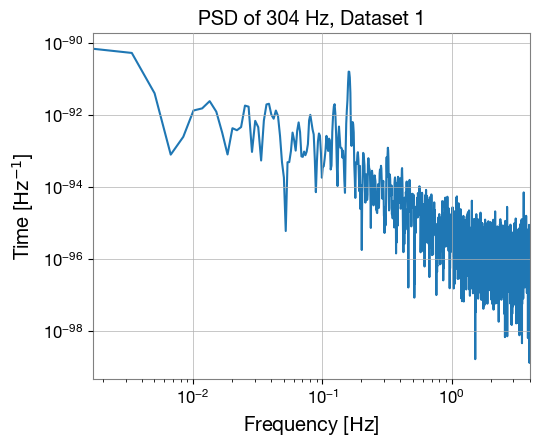

In [30]:
fss1 = freq_specific_time_series(hdata1, min_time1, 4, 0.125, max_time1, 304)
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 1')
plot.show()

In [31]:
# Next 10 mins
min_time2 = 1263098020
max_time2 = 1263098620
hdata2 = TimeSeries.fetch_open_data('H1', min_time2, max_time2)

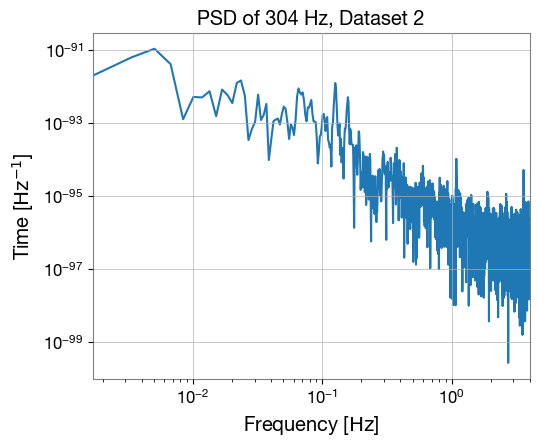

In [32]:
fss2 = freq_specific_time_series(hdata2, min_time2, 4, 0.125, max_time2, 304)
psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 2')
plot.show()

In [33]:
# Next next 10 mins
min_time3 = 1263098620
max_time3 = 1263099220
hdata3 = TimeSeries.fetch_open_data('H1', min_time3, max_time3)

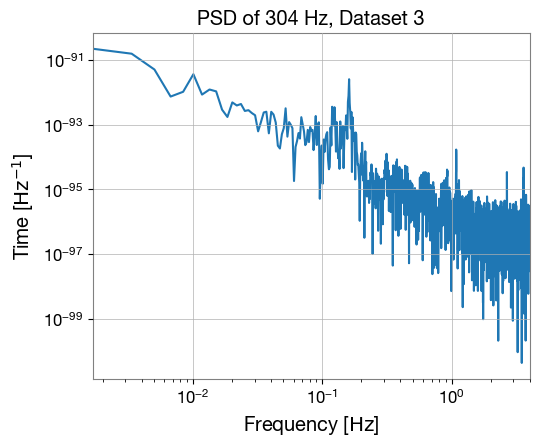

In [34]:
fss3 = freq_specific_time_series(hdata3, min_time3, 4, 0.125, max_time3, 304)
psd3 = fss3.psd()
plot = psd3.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 3')
plot.show()

In [35]:
# Next next next 10 mins
min_time4 = 1263099220
max_time4 = 1263099820
hdata4 = TimeSeries.fetch_open_data('H1', min_time4, max_time4)

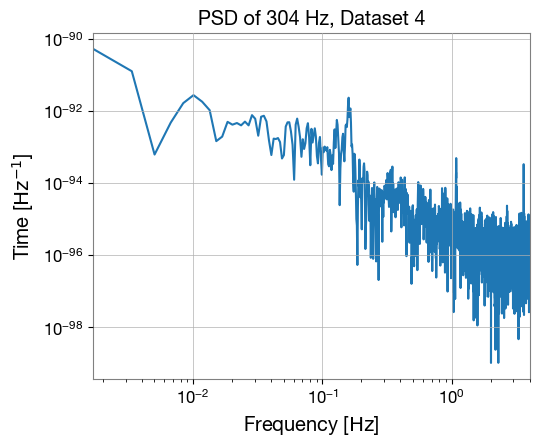

In [36]:
fss4 = freq_specific_time_series(hdata4, min_time4, 4, 0.125, max_time4, 304)
psd4 = fss4.psd()
plot = psd4.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 4')
plot.show()

In [37]:
# Next next next next 10 mins
min_time5 = 1263099820
max_time5 = 1263100420
hdata5 = TimeSeries.fetch_open_data('H1', min_time5, max_time5)

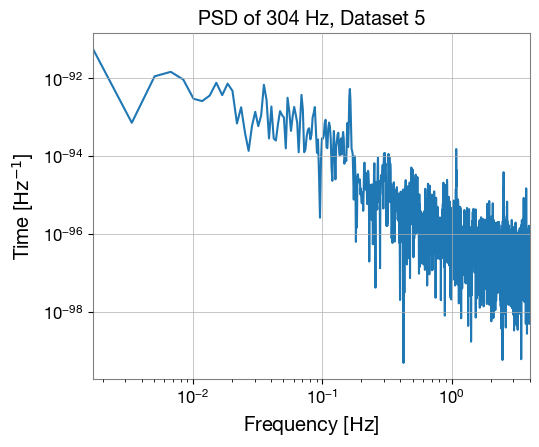

In [38]:
fss5 = freq_specific_time_series(hdata5, min_time5, 5, 0.125, max_time5, 304)
psd5 = fss5.psd()
plot = psd5.plot()
ax = plot.gca()
ax.set_title('PSD of 304 Hz, Dataset 5')
plot.show()

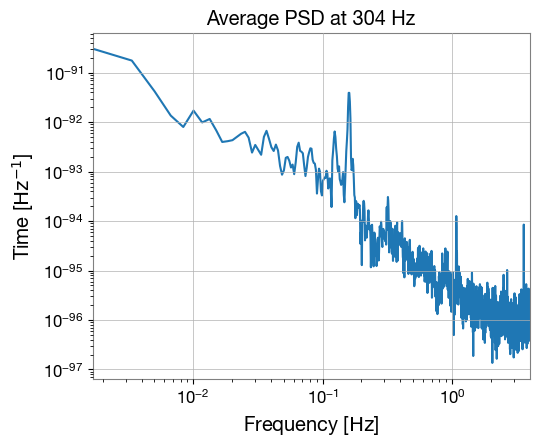

In [39]:
# Taking the average of the five PSDs
# I'm just taking the simple average
# PSD5 has four fewer data points than the others
avgPSD = (psd1[:-4] + psd2[:-4] + psd3[:-4] + psd4[:-4] + psd5) / 5
plot = avgPSD.plot()
ax = plot.gca()
ax.set_title('Average PSD at 304 Hz')
plot.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/types/series.py:991: UserWarning: FrequencySeries.crop given end larger than current end, crop will begin when the Series actually ends.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/gwpy/plot/plot.py:287: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  super().show(warn=warn)


<Quantity 0.0016775 Hz>

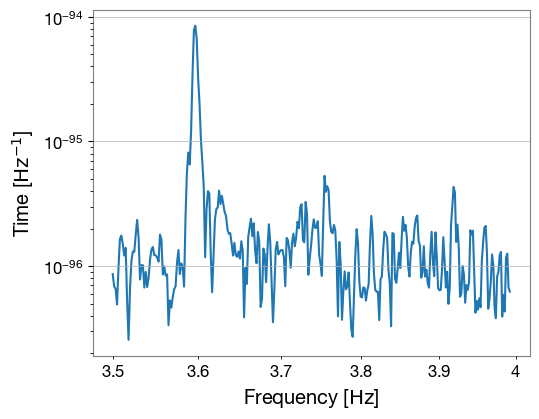

In [57]:
cropped = avgPSD.crop(3.5, 4)
plot = cropped.plot()
plot.show()
index = np.argmax(cropped)
cropped.frequencies[index]

### 304 Hz conclusion

Based on the five graphs analyzed, there seem to be three consistent features at about:
- 0.2 Hz - possibly microseismic noise from the ocean?
- 1 Hz
- Between 3 and 4 Hz

However, when the five PSDs are averaged, none of these spikes remain. The reason for this is unclear to me. I checked already that the frequency series resulting from the PSDs all have the same start frequency and step size. I also checked to see if the result was the same when I removed PSD5 from the average, and it was indeed a similar result. Could binning change the result?

## 320 Hz

320 Hz could share these features since it's near 304 Hz and seems to share the same things in the spectrogram.

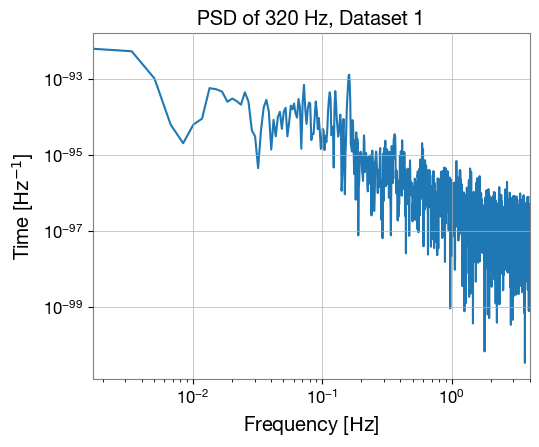

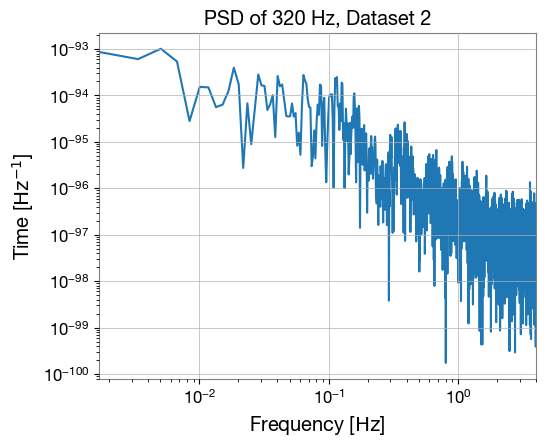

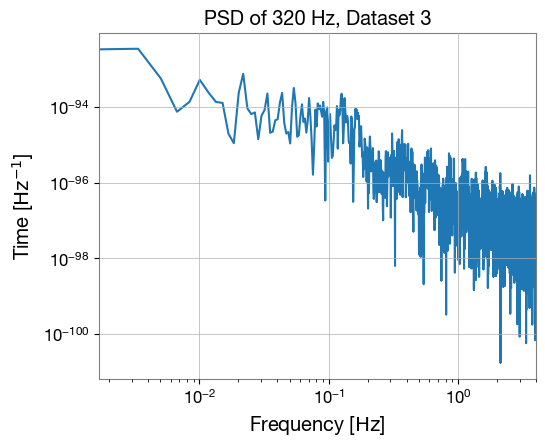

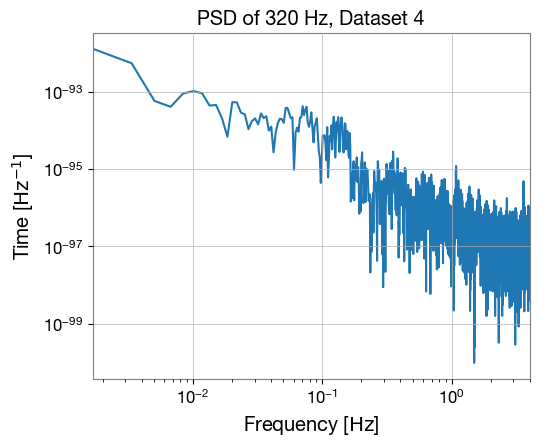

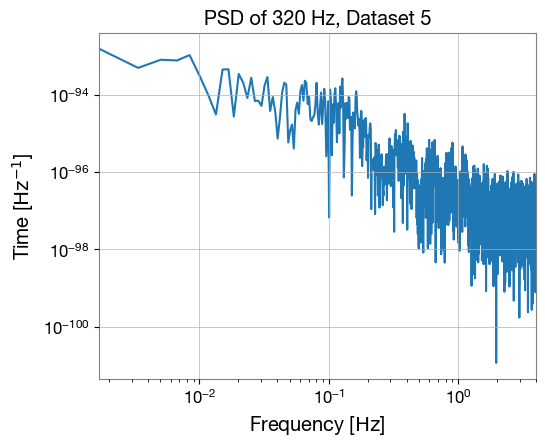

In [14]:
fss1 = freq_specific_time_series(hdata1, min_time1, 4, 0.125, max_time1, 320)
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz, Dataset 1')
plot.show()

fss2 = freq_specific_time_series(hdata2, min_time2, 4, 0.125, max_time2, 320)
psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz, Dataset 2')
plot.show()

fss3 = freq_specific_time_series(hdata3, min_time3, 4, 0.125, max_time3, 320)
psd3 = fss3.psd()
plot = psd3.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz, Dataset 3')
plot.show()

fss4 = freq_specific_time_series(hdata4, min_time4, 4, 0.125, max_time4, 320)
psd4 = fss4.psd()
plot = psd4.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz, Dataset 4')
plot.show()

fss5 = freq_specific_time_series(hdata5, min_time5, 4, 0.125, max_time5, 320)
psd5 = fss5.psd()
plot = psd5.plot()
ax = plot.gca()
ax.set_title('PSD of 320 Hz, Dataset 5')
plot.show()

### 320 Hz Conclusion

Unlike 304 Hz, there doesn't seem to be any clear peaks in this data.

## 512 Hz

Based on the spectrogram, there also seems to be some oscillating pattern at around 500 Hz. Let's find out:

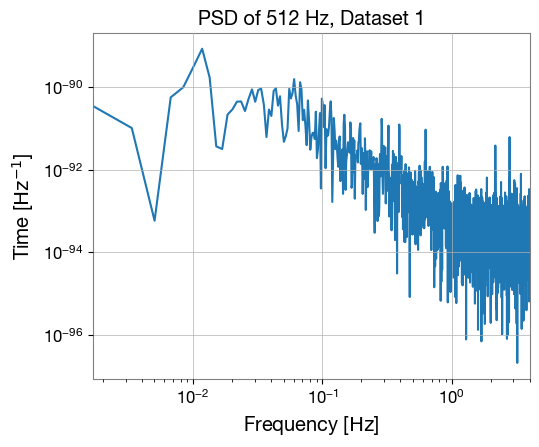

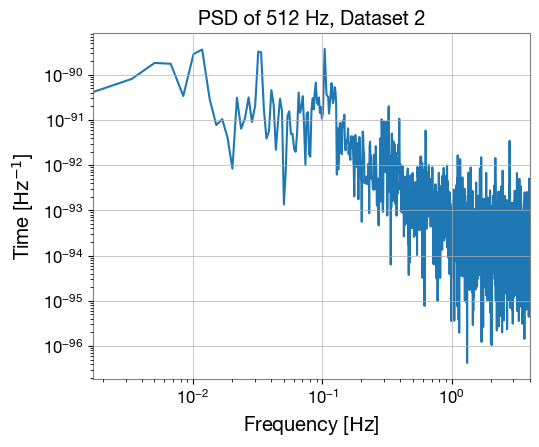

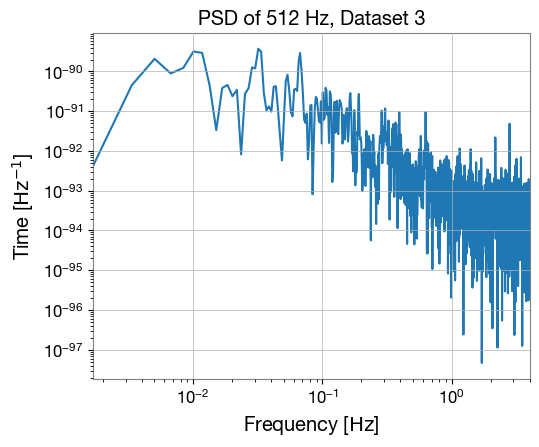

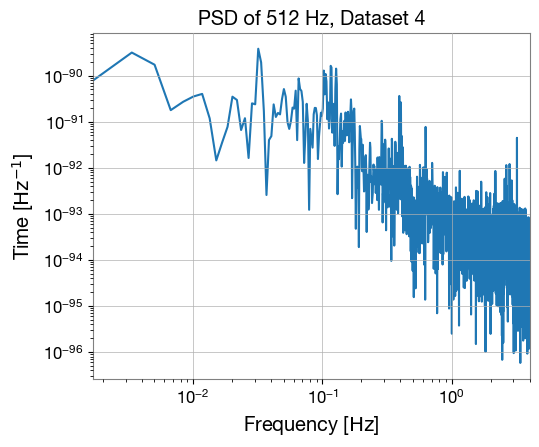

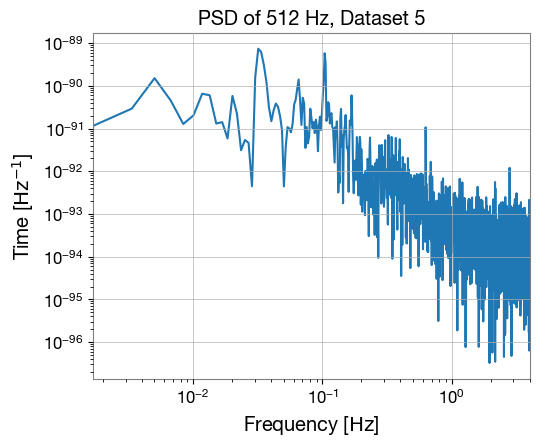

In [15]:
fss1 = freq_specific_time_series(hdata1, min_time1, 4, 0.125, max_time1, 512)
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 1')
plot.show()

fss2 = freq_specific_time_series(hdata2, min_time2, 4, 0.125, max_time2, 512)
psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 2')
plot.show()

fss3 = freq_specific_time_series(hdata3, min_time3, 4, 0.125, max_time3, 512)
psd3 = fss3.psd()
plot = psd3.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 3')
plot.show()

fss4 = freq_specific_time_series(hdata4, min_time4, 4, 0.125, max_time4, 512)
psd4 = fss4.psd()
plot = psd4.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 4')
plot.show()

fss5 = freq_specific_time_series(hdata5, min_time5, 4, 0.125, max_time5, 512)
psd5 = fss5.psd()
plot = psd5.plot()
ax = plot.gca()
ax.set_title('PSD of 512 Hz, Dataset 5')
plot.show()

These seem to have quite a few spikes. Averaging:

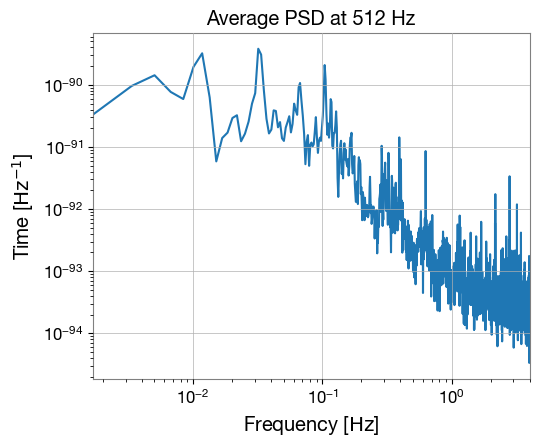

In [16]:
# Taking the average of the five PSDs
# I'm just taking the simple average
# PSD5 has four fewer data points than the others
avgPSD = (psd1 + psd2 + psd3 + psd4 + psd5) / 5
plot = avgPSD.plot()
ax = plot.gca()
ax.set_title('Average PSD at 512 Hz')
plot.show()

## 80 Hz

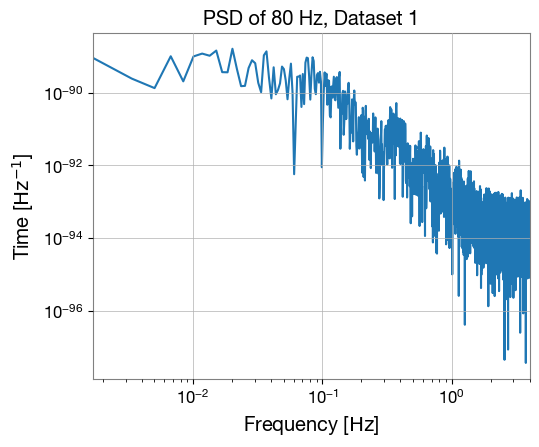

In [17]:
fss1 = freq_specific_time_series(hdata1, min_time1, 4, 0.125, max_time1, 80)
psd1 = fss1.psd()
plot = psd1.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 1')
plot.show()

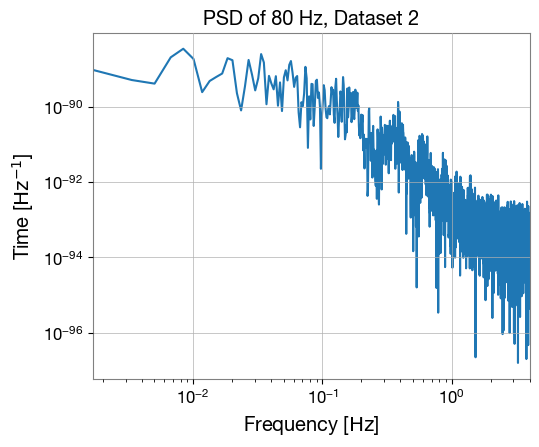

In [18]:
fss2 = freq_specific_time_series(hdata2, min_time2, 4, 0.125, max_time2, 80)
psd2 = fss2.psd()
plot = psd2.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 2')
plot.show()

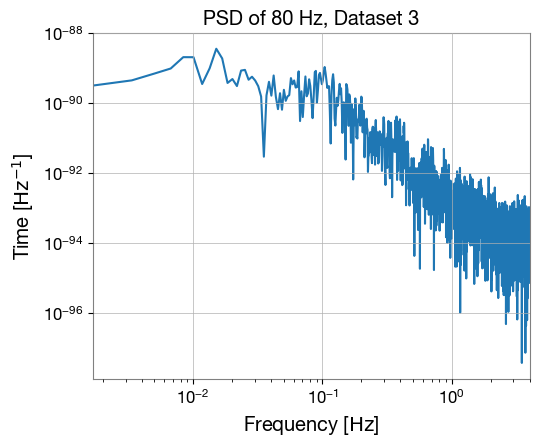

In [19]:
fss3 = freq_specific_time_series(hdata3, min_time3, 4, 0.125, max_time3, 80)
psd3 = fss3.psd()
plot = psd3.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 3')
plot.show()

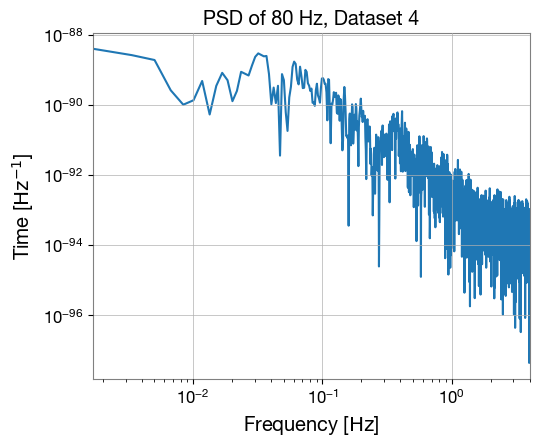

In [20]:
fss4 = freq_specific_time_series(hdata4, min_time4, 4, 0.125, max_time4, 80)
psd4 = fss4.psd()
plot = psd4.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 4')
plot.show()

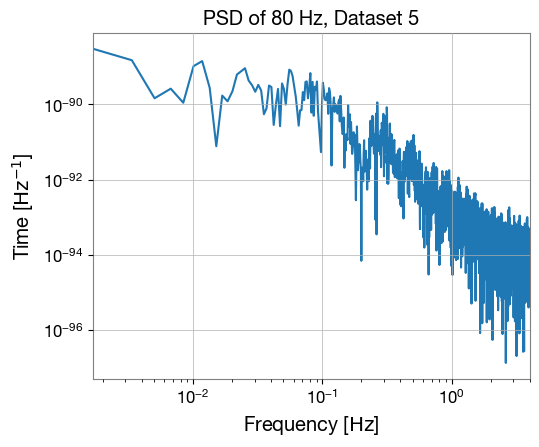

In [21]:
fss5 = freq_specific_time_series(hdata5, min_time5, 5, 0.125, max_time5, 80)
psd5 = fss5.psd()
plot = psd5.plot()
ax = plot.gca()
ax.set_title('PSD of 80 Hz, Dataset 5')
plot.show()

For next time:

- Take the average of the five PSDs at 304 Hz **(done)**
- Plot the frequency-specific time series for the five or six bins that make vertical strands on the spectrogram; try averaging them in a way that makes sense (perhaps normalizing them beforehand since at the lowest frequency the power level is much higher)
- Try simulated optimal match filtering correction (estimate gravitational wave f over t curve with a spline?)